# Remote Sensing Example

In [2]:
import pandas as pd
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from matplotlib import pyplot

### Satellite Image

In [3]:
img = io.imread('./data/sat_example.png')
rows, cols, bands = img.shape
print(rows, cols, bands)

300 300 3


### Labels

In [4]:
classes = {'vegetation': 0, 'building': 1, 'water': 2}
n_classes = len(classes)
palette = np.uint8([[0, 255, 0], [255, 0, 0], [0, 0, 255]])

# we get/construct some labeling 
labels = n_classes*np.ones(shape=(rows, cols), dtype=np.int)
labels[200:220, 150:170] = classes['building']
labels[40:60, 40:60] = classes['vegetation']
labels[100:120, 200:220] = classes['water']
rows, cols = labels.shape
print(rows, cols)

300 300


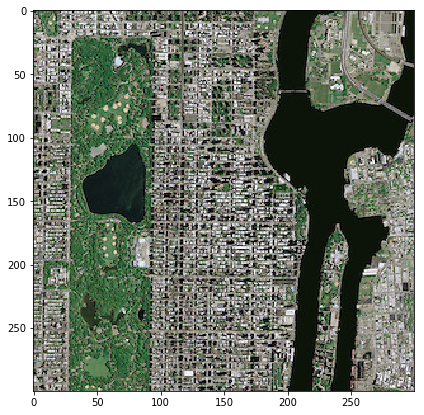

In [5]:
fig = plt.figure(figsize=(7,7))
_ = pyplot.imshow(img)

Text(0.5,1,'Satellite Image')

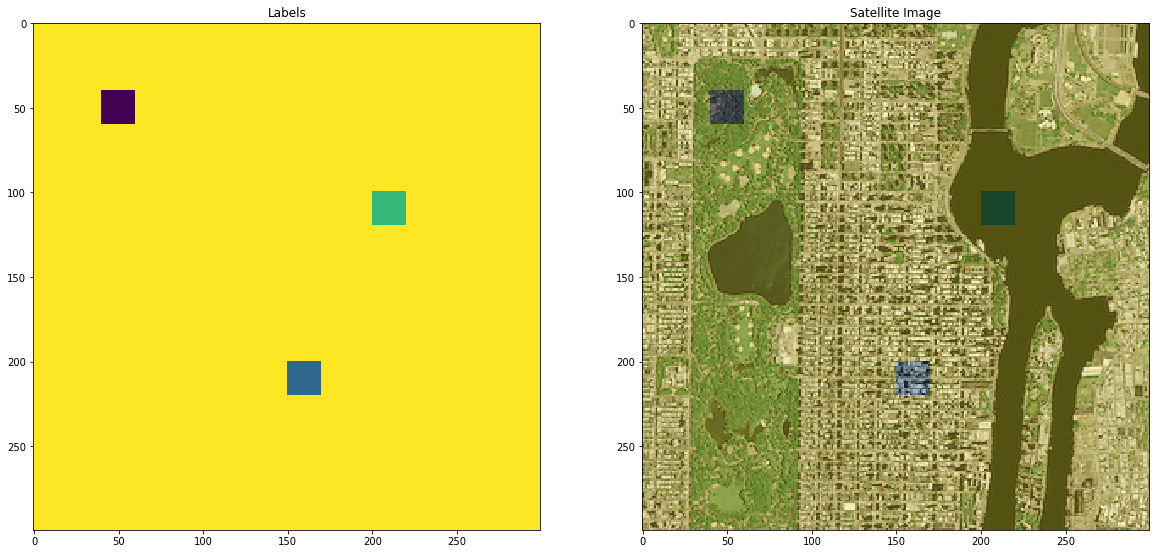

In [6]:
fig = plt.figure(figsize=(20,10))
a = fig.add_subplot(1, 2, 1)
pyplot.imshow(labels)
a.set_title('Labels')

a = fig.add_subplot(1, 2, 2)
pyplot.imshow(img)
plt.imshow(labels, alpha=0.3)
a.set_title('Satellite Image')


### Transform to ML problem

In [7]:
X = img.reshape(rows*cols, bands)
y = labels.ravel()
print(X.shape)
print(y.shape)

(90000, 3)
(90000,)


In [8]:
df = pd.DataFrame(data =  np.c_[ X, y ], columns=['r','g','b', 'label'])
df.head(2)

,r,g,b,label
0,149,147,134,3
1,83,63,56,3


### Perform Clustering

In [10]:
train = np.flatnonzero(y < n_classes)
test = np.flatnonzero(y == n_classes)

from sklearn.svm import SVC
clf = SVC()
clf.fit(X[train], y[train])
y[test] = clf.predict(X[test])

predicted = y.reshape(rows, cols)

/usr/lib64/python3.4/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


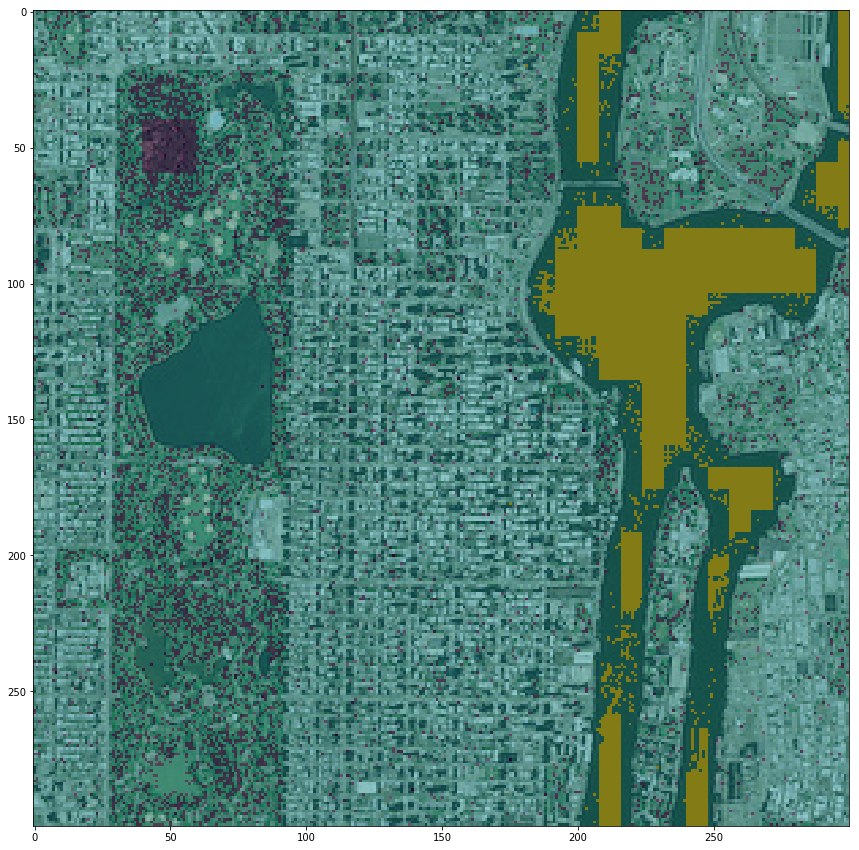

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))

plt.imshow(img, interpolation='none')
plt.imshow(predicted,  interpolation='none', alpha=0.5)
plt.show()